**DAV TECHNICAL TEAM ASSIGNMENT**

**Varsha Seemala**

**23b0964**

The dataset provided(data.csv) shows the energy generation across different regions and states. It includes various attributes such as the country, state, energy generated, type of fuel used, installed capacity, and more.Let us analyze the dataset..

Importing necessary packages:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import altair as alt

**QUESTION 1**

1) How is the distribution of powerplants accross the country?

State
Tamil Nadu       4478
Maharashtra      4417
Gujarat          3443
West Bengal      3412
Uttar Pradesh    2959
Name: count, dtype: int64


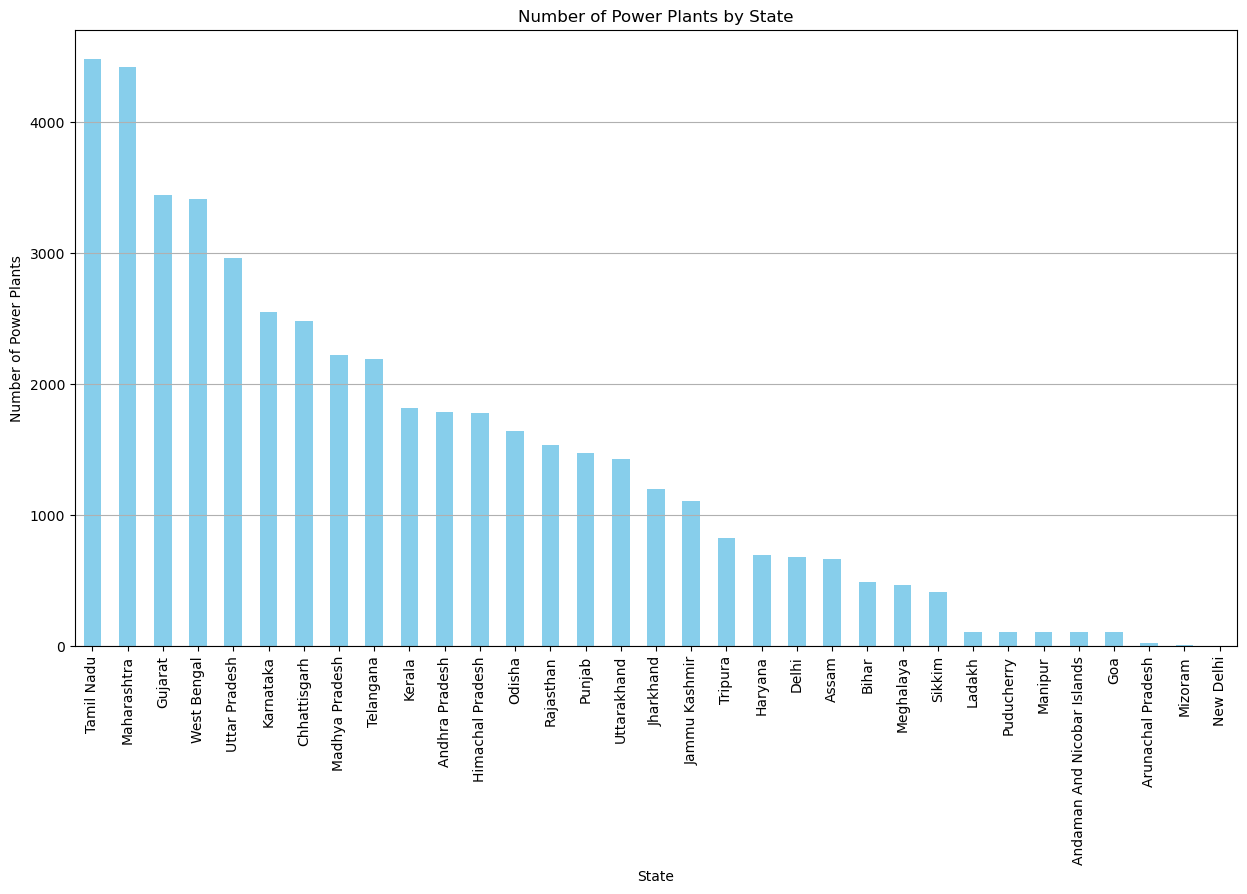

In [2]:
data = pd.read_csv('data.csv')

powerplants_by_state = data['State'].value_counts()
print(powerplants_by_state.head())

plt.figure(figsize=(15, 8))
powerplants_by_state.plot(kind='bar', color='skyblue')
plt.title('Number of Power Plants by State')
plt.xlabel('State')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

The above graph shows that TamilNadu and Maharashtra have a significantly higher count than the other states.The major industrial regions of India like Mumbai-Pune Industrial Region,Bangalore-Tamil Nadu Industrial Region belong to these states.Hence,these states are key industrial hubs and have high energy consumption needs, necessitating a larger number of power plants.States like Gujarat,West Bengal and Uttar Pradesh have a moderate number of power plants.These states have significant industrial and commercial activities but might be more efficient in energy usage or rely partially on energy imports from other states.The NorthEastern States, Goa have the lowest number of power plants possibly due to lower population density, less industrial activity, or geographical challenges.

2) Is the distribution of powerplants centralized or distributed?

We can check whether the distribution is centralized or distributed by looking at the mean and median of the data, if they are close to each other the distribution is likely to be centralized.

In [4]:
plants_per_state = powerplants_by_state.reset_index()
plants_per_state.columns = ['State', 'Number of Power Plants']
plants_per_state.sort_values(by='Number of Power Plants', ascending=False, inplace=True)
mean_plants = plants_per_state['Number of Power Plants'].mean()
median_plants = plants_per_state['Number of Power Plants'].median()
print(f"Mean Number of Power Plants per State: {mean_plants:.2f}")
print(f"Median Number of Power Plants per State: {median_plants:.2f}")


Mean Number of Power Plants per State: 1414.39
Median Number of Power Plants per State: 1196.00


The mean number of power plants per state (1414.39) is significantly higher than the median (1196.00). This indicates that a few states have a disproportionately large number of power plants, pulling the mean upwards.
Another way to look at it is using the cumulative distribution.

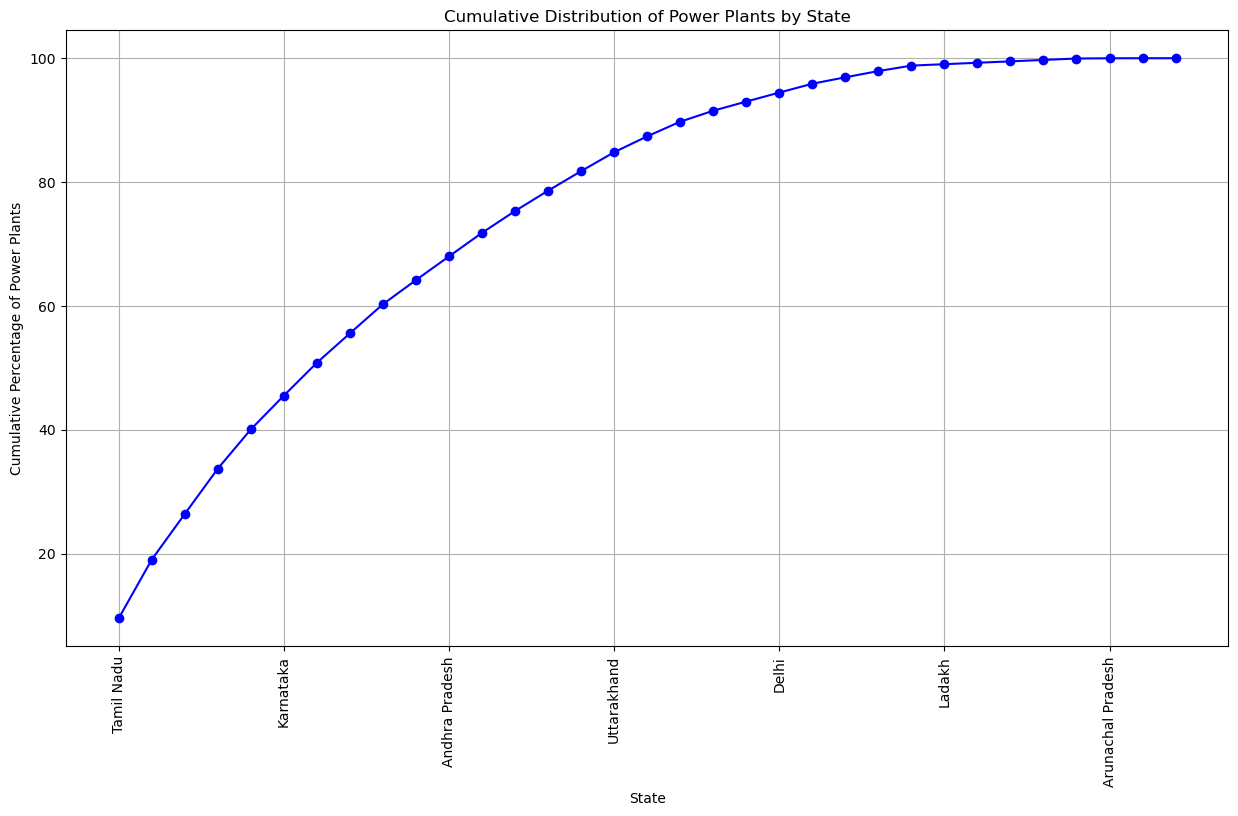

In [6]:
cumulative_distribution = powerplants_by_state.cumsum() / powerplants_by_state.sum() * 100
plt.figure(figsize=(15, 8))
cumulative_distribution.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution of Power Plants by State')
plt.xlabel('State')
plt.ylabel('Cumulative Percentage of Power Plants')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The cumulative percentage increases rapidly within the first few states, indicating centralization.This suggests that certain regions are more developed industrially and economically, leading to higher energy needs.A centralized distribution could mean that there is potential for energy distribution issues, where power needs to be transmitted over long distances to less developed areas.

3) Which state has the highest average actual energy generated?

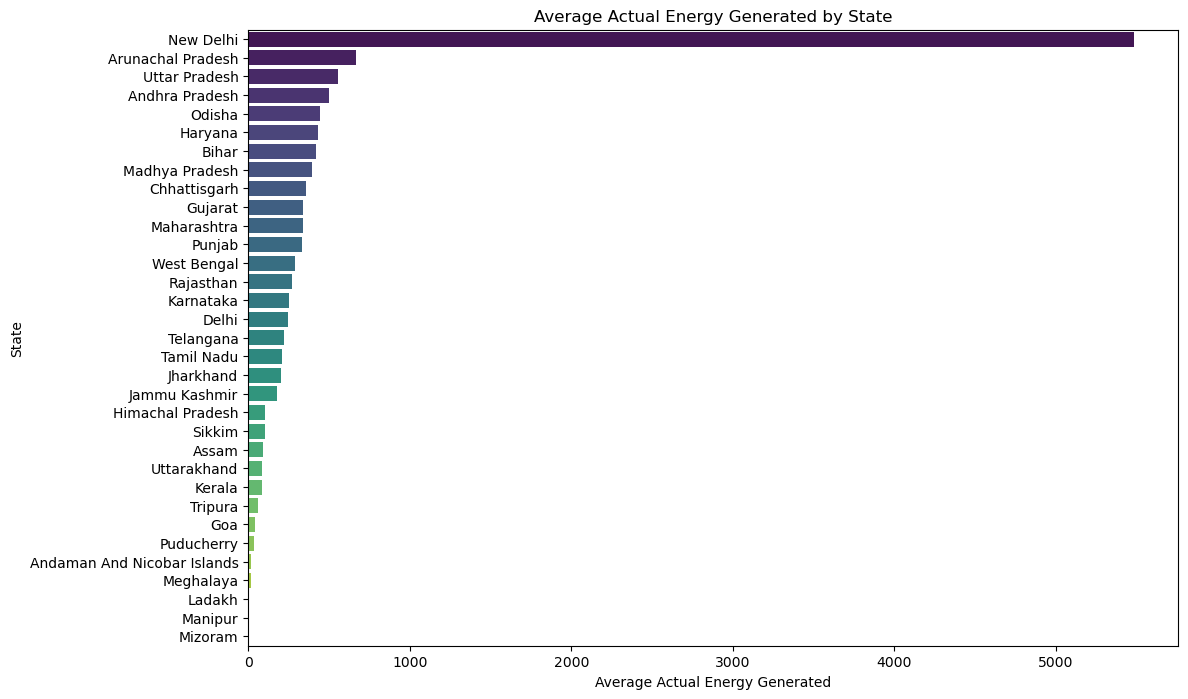

State
New Delhi    5482.0
Name: Actual energy generated, dtype: float64

In [7]:
state_avg_energy = data.groupby('State')['Actual energy generated'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=state_avg_energy.index, x=state_avg_energy.values, palette="viridis")
plt.title('Average Actual Energy Generated by State')
plt.xlabel('Average Actual Energy Generated')
plt.ylabel('State')
plt.show()
state_avg_energy.head(1)


It's important to note that this analysis is based on the average energy generated per power plant. The total energy generated by a state would also depend on the number of power plants in that state.
The state with the highest average actual energy generated is New Delhi, with an average of 5482. This is significantly higher than the other states in the top 5.There are several possible reasons why New Delhi might have the highest average energy generation:
->Higher energy demand: As the capital city and a major metropolitan area, New Delhi likely has a higher demand for energy compared to other states. This could lead to a greater need for power plants and higher energy generation.
->Different types of power plants: The types of power plants in New Delhi might be different from those in other states. For example, New Delhi might have more efficient or larger-scale power plants that can generate more energy on average.
From this we can conclude that major metropolitan areas have high energy generation and consumption meaning that these areas make a good market for the company.

4) Which type of fuel is most commonly used across different plants?

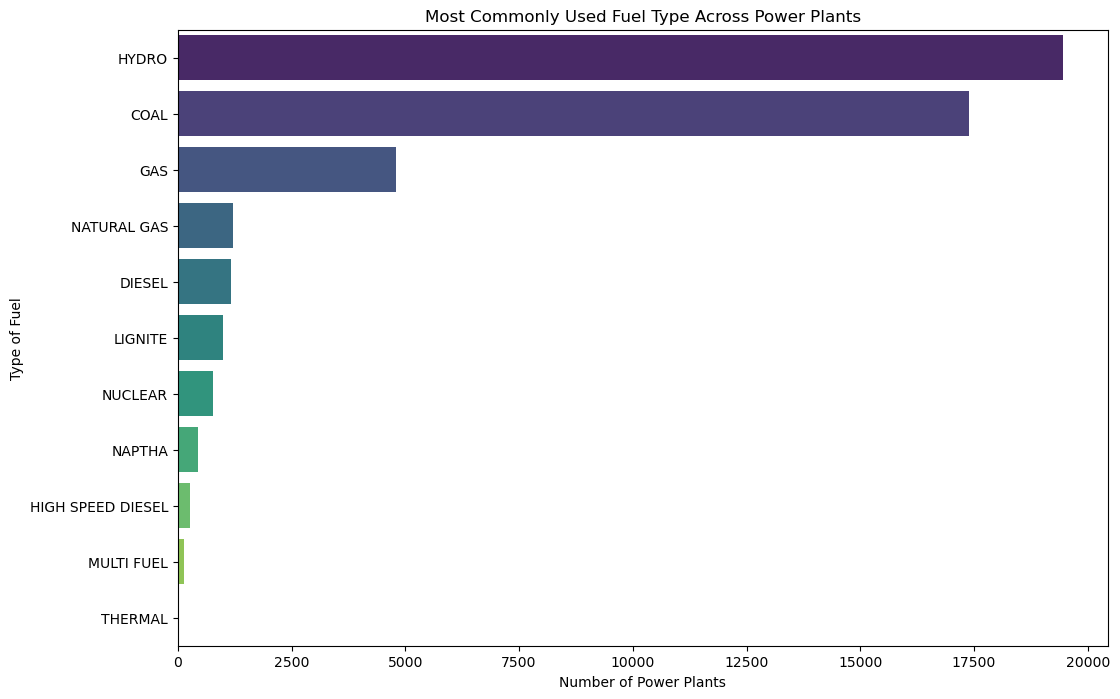

In [8]:
fuel_distribution = data['Type of fuel used'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=fuel_distribution.values, y=fuel_distribution.index, palette="viridis")
plt.title('Most Commonly Used Fuel Type Across Power Plants')
plt.xlabel('Number of Power Plants')
plt.ylabel('Type of Fuel')
plt.show()


As we can see, the most commonly used fuel type across power plants is HYDRO.While Hydro is renewable energy resource, the other common types are Coal,Gas,Natural gas etc which are non-renewable resources.This shows that while the country is heading towards more usage of renewable resources, it is still heavily dependent on non-renewable resources.We can further analyze which states are heavily dependent on non-renewable resources for power generation and try to provide renewable energy solutions.

5) How does the installed capacity vary by region?

In [10]:
region_capacity = data.groupby('Region')['Installed Capacity'].agg(['sum', 'mean'])
region_capacity.columns = ['Total Installed Capacity', 'Average Installed Capacity']
region_capacity.sort_values(by='Total Installed Capacity', ascending=False, inplace=True)
region_capacity = region_capacity.reset_index()
base = alt.Chart(region_capacity, title='Installed Capacity by Region').encode(
    x=alt.X('Region:N', axis=alt.Axis(labelAngle=-45))
).properties(
    width=500 
)
bar1 = base.mark_bar(color='steelblue').encode(
    y=alt.Y('Total Installed Capacity:Q', axis=alt.Axis(title='Total Installed Capacity (MW)')),
    tooltip = ['Region', 'Total Installed Capacity']
)
bar2 = base.mark_bar(color='firebrick').encode(
    y=alt.Y('Average Installed Capacity:Q', axis=alt.Axis(title='Average Installed Capacity (MW)', titleColor='firebrick')),
    tooltip = ['Region', 'Average Installed Capacity']
)
chart = alt.layer(bar1, bar2).resolve_scale(
    y = 'independent'
)
chart

alt.LayerChart(...)

 The Western region might have more abundant resources suitable for power generation, such as coal reserves or hydroelectric potential.The Western and Northern regions are generally more industrialized and urbanized, leading to higher energy demand and, consequently, higher installed capacity. The North Eastern region's challenging terrain and remoteness could make it more difficult and expensive to develop power infrastructure, resulting in lower installed capacity.

6) How is the distribution of the powerplants among different sectors?

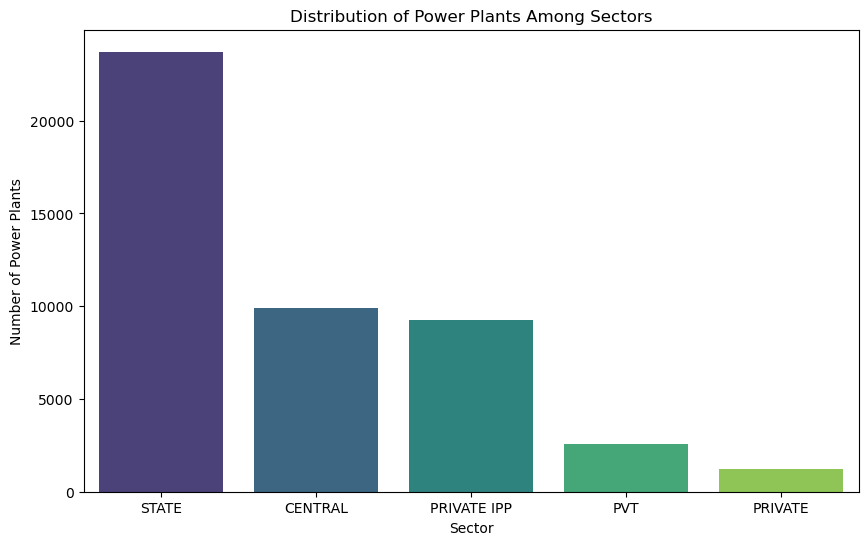

In [11]:
sector_distribution = data['Sector of power plant'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_distribution.index, y=sector_distribution.values, palette="viridis")
plt.title('Distribution of Power Plants Among Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Power Plants')
plt.show()

The dominance of the state and central sectors in terms of installed capacity reflects the historical development of the power sector in India, where the government played a major role in building and operating power plants.State and central sectors might have easier access to resources like land, coal, and water, which are essential for setting up power plants.

7) How has the total installed capacity changed over time?

In [12]:
installed_capacity_by_year = data.groupby('Year')['Installed Capacity'].sum().reset_index()
installed_capacity_by_year = installed_capacity_by_year.sort_values('Year')
chart = alt.Chart(installed_capacity_by_year, title='Total Installed Capacity Over Time').mark_line(point=True).encode(
    x=alt.X('Year:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Installed Capacity:Q', title='Total Installed Capacity (MW)'),
    tooltip=['Year', 'Installed Capacity']
).properties(
    width=500
).interactive()
chart

alt.Chart(...)

The total installed capacity in India has generally increased from 2008 to 2016, with a significant drop in 2017.  The increasing focus on renewable energy sources might have led to a surge in the installation of solar, wind, and other renewable energy projects.This trend suggests a period of rapid growth in energy infrastructure development in India, followed by a sudden slowdown or change in reporting in 2017.The sudden drop in 2017 could be due to changes in data collection methodologies or reporting standards, rather than an actual decrease in installed capacity.

8) Which coal company owns highest number of powerplants in the country?

In [13]:
data.dropna(subset=['Name of coal company'], inplace=True)
company_powerplants = data.groupby('Name of coal company')['Station Name'].nunique().reset_index()
company_powerplants.columns = ['Name of coal company', 'Number of Power Plants']
company_powerplants.sort_values(by='Number of Power Plants', ascending=False, inplace=True)
top_10_companies = company_powerplants.head(10)
chart = alt.Chart(top_10_companies, title='Top 10 Coal Companies by Number of Power Plants').mark_bar().encode(
    x=alt.X('Name of coal company:N', sort='-y', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Number of Power Plants:Q'),
    tooltip=['Name of coal company', 'Number of Power Plants']
).properties(
    width=500
).interactive()
chart


alt.Chart(...)

TNGDCL is the coal company that owns the highest number of power plants (44) in the country.

other companies like NTPC Ltd. and KSEB also own a significant number of coal companies.

9) Which power station has the highest energy consumption and what is the type of enrgy resource it utilizes?

In [14]:
sorted_df = data.sort_values(by='Actual energy generated', ascending=False)
highest_energy_station = sorted_df.iloc[0]
station_name = highest_energy_station['Station Name']
fuel_type = highest_energy_station['Type of fuel used']
print(f"The power station with the highest energy generation is '{station_name}' and it uses '{fuel_type}' as its energy source.")

The power station with the highest energy generation is 'TALCHER STPS' and it uses 'COAL' as its energy source.


This is not surprising, as coal accounts for 72.55% of India's energy generation. This highlights a significant opportunity for our company to promote alternative energy sources and tap into the large market potential for renewable energy in India.

10) How does the growth rate of installed capacity for renewable energy sources compare to that of non-renewable sources over time?

In [15]:
renewable_fuels = ['HYDRO']
data['Fuel Type Category'] = data['Type of fuel used'].apply(lambda x: 'Renewable' if x in renewable_fuels else 'Non-Renewable')
filtered_df = data[data['Year'].between('Calendar Year (Jan - Dec), 2008', 'Calendar Year (Jan - Dec), 2016')].copy()
grouped_df = filtered_df.groupby(['Year', 'Fuel Type Category'])['Installed Capacity'].sum().reset_index()
pivoted_df = grouped_df.pivot(index='Year', columns='Fuel Type Category', values='Installed Capacity').reset_index()

for fuel_type in pivoted_df.columns[1:]:
    pivoted_df[f'{fuel_type} Growth Rate'] = pivoted_df[fuel_type].pct_change() * 100

melted_df = pivoted_df.melt(id_vars='Year', var_name='Fuel Type', value_name='Growth Rate')
melted_df = melted_df[melted_df['Fuel Type'].str.contains('Growth Rate')]

chart = alt.Chart(melted_df, title='Annual Growth Rate of Installed Capacity by Fuel Type').mark_line(point=True).encode(
    x=alt.X('Year:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Growth Rate:Q', title='Growth Rate (%)'),
    color='Fuel Type:N',
    tooltip=['Year', 'Fuel Type', 'Growth Rate']
).properties(
    width=500 
).interactive()
chart

alt.Chart(...)

In general, the growth rate of non-renewable sources has been higher than that of renewable sources in most years. However, there have been instances where renewable sources experienced higher growth rates.India is heavily dependent on non-renewable resources and this is indicated in the growth rate of their installed capacity.

**QUESTION 2**

To correlate pollution trends with power plants, we would need additional data on pollution levels over time, ideally with geographic information to match it with the locations of power plants in the dataset.

Potential sources that i have found for acquiring this data:
[Central Pollution Control Board (CPCB) in India](https://cpcb.nic.in/)
->The air and water quality in india over the years can be assessed though the annual reports
    [Annual reports](https://cpcb.nic.in/annual-report/)
[World Air Quality Index Project](https://waqi.info/) is an Environmental data platform that aggregates air quality data from monitoring stations worldwide, including India.
Other sources include International Organizations such as the World Health Organization (WHO) and Non-Governmental organistions focussing on Environmental issues in the country.
